# Instrument Calculations - James Amidei 09/15/2023

### Materials 

Ba-133 
- 1 micro curie  
- 10.5 yrs 

Na-22
- 1 micro curie  
- 2.6 yrs

Co-57
- 1 micro curie 
- 272 days

Co-60
- 1 micro curie
- 5.27 yrs

Mn-54
- 1 micro curie
- 312 days

Cd-109
- 1 micro curie 
- 463 days

Unknown 
- 0.5 micro curies & 1 micro curie 


### Detector Calibration Settings 

Course Gain - 2

Fine Gain - 1.09

Highest Energy - Co-60

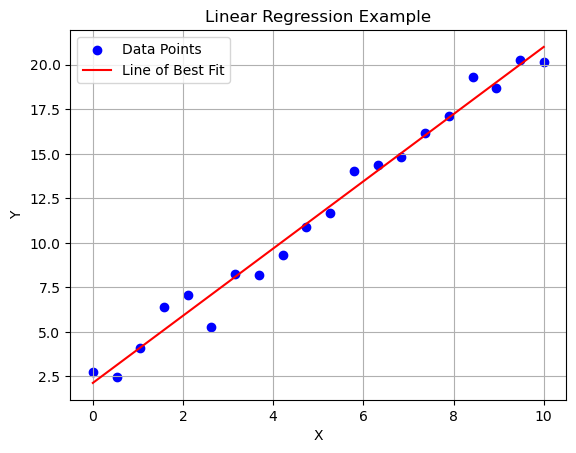

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
x = np.linspace(0, 10, 20)  
y = 2 * x + 1 + np.random.randn(20)  

coefficients = np.polyfit(x, y, 1) 
line_of_best_fit = np.poly1d(coefficients)

plt.scatter(x, y, label='Data Points', color='blue')

x_range = np.linspace(0, 10, 100)  
plt.plot(x_range, line_of_best_fit(x_range), label='Line of Best Fit', color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.title('Linear Regression Example')
plt.grid(True)
plt.show()

In [7]:
import pylab as plb
import matplotlib as plt
from scipy.optimize import curve_fit

# Read in data -- first 2 rows are header in this example. 

data = plb.loadtxt('replacewith.csv', skiprows=1, delimiter=',')

x=data[:,0]
y=data[:,1]
# mean = sum(x*y)
# sigma = sum(y*(x-mean)**2)

xx = x[246:456]

#def gauss_function(x, a, x0, sigma):
#    return a*np.exp(-x-x0)**2/(2*sigma**2)
def gauss_function(x, Amp, Mean, Width, VertOffset):
    return Amp*np.exp(-(x-Mean)**2/(2*Width**2)) + VertOffset
popt, pcov = curve_fit(gauss_function, x, y, p0 = [20, 20, 20, 45]) # starting params are (slope, intercept)
plt.plot(x, gauss_function(x, *popt), label='fit')

#plot data 

plt.plot(x, y, 'r*', label='data')
perr = np.sqrt(np.diag(pcov)) # print the uncertainties

# Add some axis labels

plt.legend()
plt.title('Fig 3 - Fit for Gaussian Function')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

print('Amplitude : ', popt[0], '+/-', perr[0])
print('Mean : ', popt[1], '+/-', perr[1])
print('Width : ', popt[2], '+/-', perr[2])
print('Vertical Offset : ', popt[3], '+/-', perr[3])

FileNotFoundError: datafile.csv not found.